# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)

lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

 ### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name). 


In [3]:
#perform API calls to check the weather of each city in the list


#empty list to populate, pass to df, and plot

city_list = []
temps = []
humidity = []
clouds = []
winds = []
lats = []
longs = []
countries = []
date = []

#set url via f-strings literal


units = 'imperial'
 
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='


In [4]:
#check weather api documentation for needed query keywords

In [5]:
# iterate through cities list to populate the empty df lists above by API requests

#set loop counters
counter = 0
set_counter = 1

for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        
        clouds.append(response['clouds']['all'])
        
        countries.append(response['sys']['country'])
        
        humidity.append(response['main']['humidity'])
        
        lats.append(response['coord']['lat'])
        
        longs.append(response['coord']['lon'])
        
        temps.append(response['main']['temp_max'])
        
        winds.append(response['wind']['speed'])
        
        date.append(response['dt'])
        if counter > 49:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print("Beginning Data Retrieval ")
        print("-----------------------------")
        print(f"Processing Record # : {counter} of Set {set_counter} | {i}")
    
    except:
        print("City not found. Skipping...")
print("------------------------------\nData API Response Complete\n------------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record # : 1 of Set 1 | punta arenas
Beginning Data Retrieval 
-----------------------------
Processing Record # : 2 of Set 1 | busselton
Beginning Data Retrieval 
-----------------------------
Processing Record # : 3 of Set 1 | vaini
City not found. Skipping...
Beginning Data Retrieval 
-----------------------------
Processing Record # : 4 of Set 1 | kodiak
Beginning Data Retrieval 
-----------------------------
Processing Record # : 5 of Set 1 | saint-philippe
Beginning Data Retrieval 
-----------------------------
Processing Record # : 6 of Set 1 | hobart
Beginning Data Retrieval 
-----------------------------
Processing Record # : 7 of Set 1 | wewak
Beginning Data Retrieval 
-----------------------------
Processing Record # : 8 of Set 1 | bluff
Beginning Data Retrieval 
-----------------------------
Processing Record # : 9 of Set 1 | albany
Beginning Data Retrieval 
-----------------------------
Processing Record # 

Beginning Data Retrieval 
-----------------------------
Processing Record # : 29 of Set 2 | georgetown
Beginning Data Retrieval 
-----------------------------
Processing Record # : 30 of Set 2 | sao felix do xingu
Beginning Data Retrieval 
-----------------------------
Processing Record # : 31 of Set 2 | bambous virieux
Beginning Data Retrieval 
-----------------------------
Processing Record # : 32 of Set 2 | flinders
Beginning Data Retrieval 
-----------------------------
Processing Record # : 33 of Set 2 | castro
Beginning Data Retrieval 
-----------------------------
Processing Record # : 34 of Set 2 | port lincoln
Beginning Data Retrieval 
-----------------------------
Processing Record # : 35 of Set 2 | golden
Beginning Data Retrieval 
-----------------------------
Processing Record # : 36 of Set 2 | kalyny
Beginning Data Retrieval 
-----------------------------
Processing Record # : 37 of Set 2 | andros town
City not found. Skipping...
Beginning Data Retrieval 
-----------------

Beginning Data Retrieval 
-----------------------------
Processing Record # : 9 of Set 4 | inhambane
Beginning Data Retrieval 
-----------------------------
Processing Record # : 10 of Set 4 | batagay-alyta
Beginning Data Retrieval 
-----------------------------
Processing Record # : 11 of Set 4 | asau
Beginning Data Retrieval 
-----------------------------
Processing Record # : 12 of Set 4 | ostrovnoy
Beginning Data Retrieval 
-----------------------------
Processing Record # : 13 of Set 4 | singkang
Beginning Data Retrieval 
-----------------------------
Processing Record # : 14 of Set 4 | victoria
Beginning Data Retrieval 
-----------------------------
Processing Record # : 15 of Set 4 | itarema
Beginning Data Retrieval 
-----------------------------
Processing Record # : 16 of Set 4 | tuatapere
City not found. Skipping...
Beginning Data Retrieval 
-----------------------------
Processing Record # : 17 of Set 4 | pitimbu
Beginning Data Retrieval 
-----------------------------
Proces

Beginning Data Retrieval 
-----------------------------
Processing Record # : 37 of Set 5 | rajshahi
Beginning Data Retrieval 
-----------------------------
Processing Record # : 38 of Set 5 | burnie
Beginning Data Retrieval 
-----------------------------
Processing Record # : 39 of Set 5 | pacific grove
Beginning Data Retrieval 
-----------------------------
Processing Record # : 40 of Set 5 | chimbote
Beginning Data Retrieval 
-----------------------------
Processing Record # : 41 of Set 5 | nouadhibou
Beginning Data Retrieval 
-----------------------------
Processing Record # : 42 of Set 5 | marks
Beginning Data Retrieval 
-----------------------------
Processing Record # : 43 of Set 5 | atuona
Beginning Data Retrieval 
-----------------------------
Processing Record # : 44 of Set 5 | lyngdal
Beginning Data Retrieval 
-----------------------------
Processing Record # : 45 of Set 5 | saint-pierre
Beginning Data Retrieval 
-----------------------------
Processing Record # : 46 of Set 

Beginning Data Retrieval 
-----------------------------
Processing Record # : 18 of Set 7 | homer
Beginning Data Retrieval 
-----------------------------
Processing Record # : 19 of Set 7 | manchester
Beginning Data Retrieval 
-----------------------------
Processing Record # : 20 of Set 7 | tual
Beginning Data Retrieval 
-----------------------------
Processing Record # : 21 of Set 7 | ndele
Beginning Data Retrieval 
-----------------------------
Processing Record # : 22 of Set 7 | paracuru
City not found. Skipping...
City not found. Skipping...
Beginning Data Retrieval 
-----------------------------
Processing Record # : 23 of Set 7 | faya
Beginning Data Retrieval 
-----------------------------
Processing Record # : 24 of Set 7 | vega de alatorre
Beginning Data Retrieval 
-----------------------------
Processing Record # : 25 of Set 7 | jalu
Beginning Data Retrieval 
-----------------------------
Processing Record # : 26 of Set 7 | chumikan
Beginning Data Retrieval 
-----------------

Beginning Data Retrieval 
-----------------------------
Processing Record # : 46 of Set 8 | tandalti
Beginning Data Retrieval 
-----------------------------
Processing Record # : 47 of Set 8 | coihaique
Beginning Data Retrieval 
-----------------------------
Processing Record # : 48 of Set 8 | cayenne
Beginning Data Retrieval 
-----------------------------
Processing Record # : 49 of Set 8 | chadan
Beginning Data Retrieval 
-----------------------------
Processing Record # : 50 of Set 8 | muswellbrook
Beginning Data Retrieval 
-----------------------------
Processing Record # : 1 of Set 9 | kensington
Beginning Data Retrieval 
-----------------------------
Processing Record # : 2 of Set 9 | qaqortoq
Beginning Data Retrieval 
-----------------------------
Processing Record # : 3 of Set 9 | kieta
Beginning Data Retrieval 
-----------------------------
Processing Record # : 4 of Set 9 | turgenevo
Beginning Data Retrieval 
-----------------------------
Processing Record # : 5 of Set 9 | pi

Beginning Data Retrieval 
-----------------------------
Processing Record # : 27 of Set 10 | mitsamiouli
Beginning Data Retrieval 
-----------------------------
Processing Record # : 28 of Set 10 | baiao
Beginning Data Retrieval 
-----------------------------
Processing Record # : 29 of Set 10 | labuhan
Beginning Data Retrieval 
-----------------------------
Processing Record # : 30 of Set 10 | riyadh
Beginning Data Retrieval 
-----------------------------
Processing Record # : 31 of Set 10 | morobuan
Beginning Data Retrieval 
-----------------------------
Processing Record # : 32 of Set 10 | ikalamavony
Beginning Data Retrieval 
-----------------------------
Processing Record # : 33 of Set 10 | marsa matruh
Beginning Data Retrieval 
-----------------------------
Processing Record # : 34 of Set 10 | nyurba
Beginning Data Retrieval 
-----------------------------
Processing Record # : 35 of Set 10 | talnakh
Beginning Data Retrieval 
-----------------------------
Processing Record # : 36 

In [6]:
#convert to raw df
weatherpy_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,   
}

Export the city data into a .csv.
Display the DataFrame

In [7]:
weatherpy_df = pd.DataFrame(weatherpy_dict)

#export to csv
weatherpy_df.to_csv('cities.csv',encoding = 'utf-8',index = False)

weatherpy_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
weatherpy_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,8.9897,125.3400,74.08,95,100,1.03,PH,1612746927
1,busselton,-33.6500,115.3333,66.99,99,94,1.99,AU,1612746927
2,vaini,-21.2000,-175.2000,77.00,100,90,12.66,TO,1612746927
3,kodiak,57.7900,-152.4072,35.60,55,1,3.44,US,1612746927
4,saint-philippe,-21.3585,55.7679,80.60,61,90,6.91,RE,1612746928
5,hobart,-42.8794,147.3294,64.40,52,75,11.50,AU,1612746896
6,wewak,-3.5534,143.6268,84.60,66,81,1.66,PG,1612746416
7,bluff,-46.6000,168.3333,63.75,62,100,7.05,NZ,1612746896
8,albany,42.6001,-73.9662,26.01,60,79,1.99,US,1612746895
9,cape town,-36.4130,-71.9028,64.40,77,0,8.05,CL,1612746929


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
weatherpy_df.describe()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,21.584946,20.460068,47.558251,73.417122,53.249545,8.266867,1.612747e+09
std,32.105131,86.378260,31.531547,18.833378,41.431123,5.871619,7.313026e+01
min,-54.800000,-179.166700,-36.690000,3.000000,0.000000,0.200000,1.612746e+09
25%,-5.198900,-52.333300,24.100000,66.000000,1.000000,4.090000,1.612747e+09
50%,25.516700,24.666700,56.730000,78.000000,65.000000,6.910000,1.612747e+09
75%,48.600000,90.556800,74.050000,87.000000,98.000000,10.360000,1.612747e+09
max,78.218600,178.416700,91.400000,100.000000,100.000000,43.730000,1.612747e+09


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.


# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



In [11]:
weatherpy_df = pd.DataFrame(weatherpy_dict)

#export to csv
weatherpy_df.to_csv('cities.csv',encoding = 'utf-8',index = False)

weatherpy_df.count()


City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

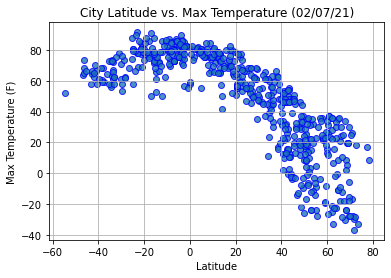

<Figure size 432x288 with 0 Axes>

In [12]:
 #temp vs latitude scatterplot, format time

plt.scatter(weatherpy_df["Lat"], 
            
            weatherpy_df["Max Temp"],
            
            edgecolor="blue", linewidths=1, marker="o", 
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)
plt.show()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

In [ ]:
#lat Vs Tem plot above analyzes the temp values as closer movement occurs, the equator becomes further away

## Latitude vs. Humidity Plot

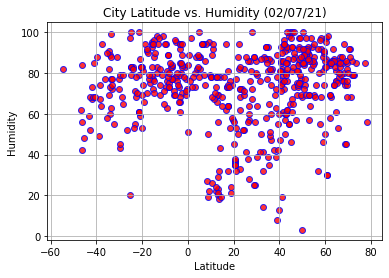

<Figure size 432x288 with 0 Axes>

In [13]:
#humidity vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Humidity"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = "red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Latitude vs Humidity.png")


In [20]:
#Lat Vs Humidity looking at humidity values as we move close to equator, humidity levels are not clearly different
#near 0 degrees latitude

## Latitude vs. Cloudiness Plot

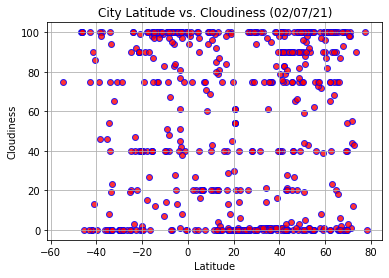

<Figure size 432x288 with 0 Axes>

In [14]:


plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Cloudiness"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'red')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

plt.ylabel("Cloudiness")

plt.xlabel("Latitude")

plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

In [ ]:
# the City Vs cloudiness plot does not show a definitive relationship btw cloud cover and the geo location

## Latitude vs. Wind Speed Plot

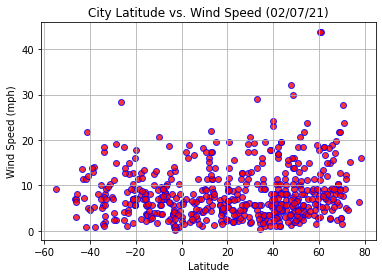

<Figure size 432x288 with 0 Axes>

In [15]:
#wind speed vs lat

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Wind Speed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'red')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

## Linear Regression

In [16]:
#linear regression by hemisphere

#create northern and southern df
north_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat']>0)]

south_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
north_hemi_df.count()

City          384
Lat           384
Lng           384
Max Temp      384
Humidity      384
Cloudiness    384
Wind Speed    384
Country       384
Date          384
dtype: int64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
south_hemi_df.count()

City          165
Lat           165
Lng           165
Max Temp      165
Humidity      165
Cloudiness    165
Wind Speed    165
Country       165
Date          165
dtype: int64

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    # Plot
    plt.scatter(x,y)
    
    plt.plot(x,y_pred,"r-")
    
    plt.xlabel('Latitude')
    
    plt.ylabel(yaxis)
    
    print(f"r-squared: {rvalue}")
    plt.show()

r-squared: 0.391577684605326


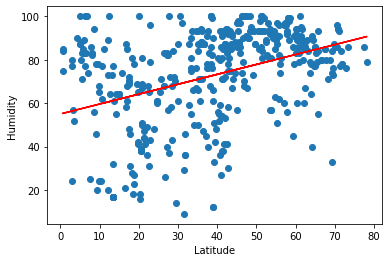

<Figure size 432x288 with 0 Axes>

In [19]:
#Northern Hemisphere - Humidity (%) vs. Latitude 

x = north_hemi_df['Lat']

y = north_hemi_df['Humidity']

line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.5146984216434106


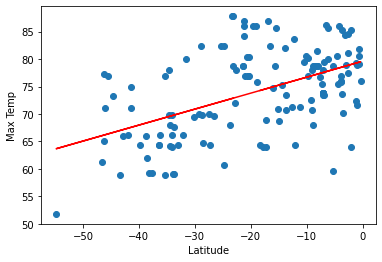

<Figure size 432x288 with 0 Axes>

In [20]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x = south_hemi_df['Lat']

y = south_hemi_df['Max Temp']

line_regr(x,y,'Max Temp')

plt.savefig("SH_temp_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.24461758868260258


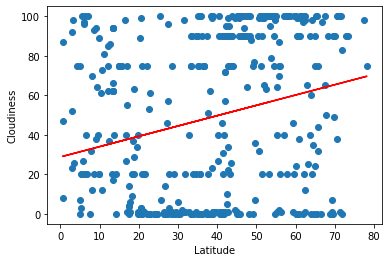

<Figure size 432x288 with 0 Axes>

In [21]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude 
x = north_hemi_df['Lat']

y = north_hemi_df['Cloudiness']

line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.3278923353470788


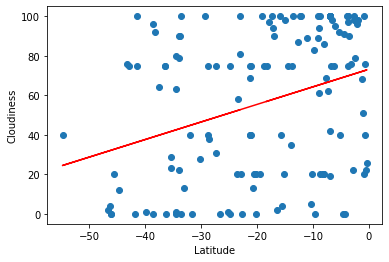

<Figure size 432x288 with 0 Axes>

In [22]:
#Southern Hemisphere - Cloudiness (%) vs. Lat
x = south_hemi_df['Lat']

y = south_hemi_df['Cloudiness']

line_regr(x,y,'Cloudiness')

plt.savefig("SH_cloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.17184953454490703


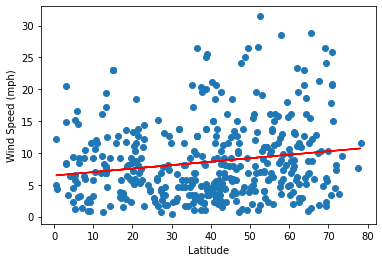

<Figure size 432x288 with 0 Axes>

In [23]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = north_hemi_df['Lat']

y = north_hemi_df['Wind Speed']

line_regr(x,y,'Wind Speed (mph)')

plt.savefig("NH_wind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.20543917026388328


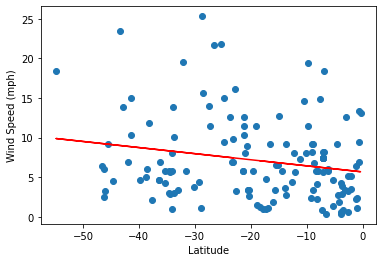

<Figure size 432x288 with 0 Axes>

In [24]:
 #Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = south_hemi_df['Lat']

y = south_hemi_df['Wind Speed']

line_regr(x,y,'Wind Speed (mph)')

plt.savefig("SH_wind_vs_lat.png")